![](images/crop_health.png)

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
train_df = pd.read_csv('csv_data/crop_health/train.csv')
test_df = pd.read_csv('csv_data/crop_health/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(88858, 10)
(59310, 9)


In [4]:
combined_df = pd.concat([train_df, test_df], axis = 0)
print(combined_df.shape)

(148168, 10)


In [5]:
combined_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148168 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Estimated_Insects_Count  148168 non-null  int64  
 2   Crop_Type                148168 non-null  int64  
 3   Soil_Type                148168 non-null  int64  
 4   Pesticide_Use_Category   148168 non-null  int64  
 5   Number_Doses_Week        148168 non-null  int64  
 6   Number_Weeks_Used        133275 non-null  float64
 7   Number_Weeks_Quit        148168 non-null  int64  
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 12.4+ MB


In [7]:
combined_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,133275.000000,148168.000000,148168.000000,88858.000000
mean,1398.212401,0.285453,0.457096,2.263802,25.850724,28.656485,9.565324,1.898527,0.190562
std,849.197419,0.451631,0.498158,0.461755,15.525407,12.403662,9.882540,0.701568,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Missing Data Visualization

In [8]:
combined_df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

<AxesSubplot: >

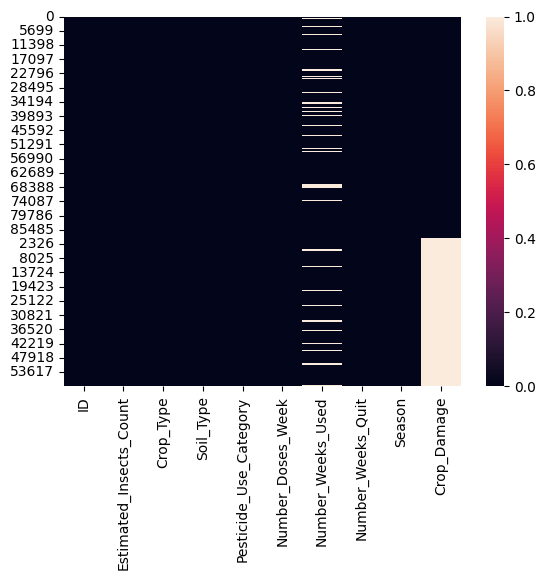

In [9]:
sns.heatmap(combined_df.isnull())

<li>From the given heatmap, we can see that there is missing value in 'Number_Weeks_Used' column.</li>

## EDA

In [170]:
def univariate_count(df, col, final_cols):
    df = df[col].value_counts().reset_index()
    df.columns = final_cols
    return df

In [171]:
def create_piechart(df, val_col, label_col, colors, title, explode):
    
    plt.figure(figsize = (8,6))
    plt.pie(df[val_col], labels = df[label_col], explode = explode,
           colors = colors, autopct = "%.2f")
    plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1))
    plt.title(title)
    plt.show()

In [172]:
def univariate_barplot(df, val_col, label_col, colors, title,
                       xlabel_title, ylabel_title):
    
    plt.figure(figsize = (8, 6))
    ax = sns.barplot(x = label_col, y = val_col, data = df, 
                     palette = colors, label = df[label_col])
    plt.legend()
    for value in ax.patches:
        ax.text(value.get_x(), value.get_height() + 5, value.get_height())
    plt.title(title)
    plt.xlabel(xlabel_title)
    plt.ylabel(ylabel_title)
    plt.show()
    


In [173]:
def univariate_histplot(df, col_name, color):
    
    plt.figure(figsize = (15, 8))
    plt.subplot(1,2,1)
    sns.histplot(df[col_name], kde = True,
                 color = color,
                 alpha = 0.2,
                line_kws = {'linestyle': 'dashed'})
    plt.subplot(1,2,2)
    sns.kdeplot(df[col_name])
    plt.show()
    
    

In [221]:
def bivariate_count(df, target_col, cause_col):
    
    bivariate_df = pd.crosstab(df[target_col], df[cause_col]).reset_index()
    bivariate_df = bivariate_df.rename_axis(None, axis = 1)
    return bivariate_df

In [246]:
def bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
#       xaxis_tickmode="array",
#       xaxis_tickvals=list(range(27)),
#       xaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout


In [247]:
def bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
#       yaxis_tickmode="array",
#       yaxis_tickvals=list(range(27)),
#       yaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout

In [248]:
def create_bivariate_bargraph(df, colors, legend_labels,
                              target_col, graph_orientation, bar_width, bar_height,
                              legend_x, legend_y, fig_title, 
                              x_axis_title, y_axis_title):
    
    barplots = []
    columns = [col for col in list(df.columns) if col not in target_col]
    target_values = df[target_col]
    target_indexes = list(range(len(df)))
    if graph_orientation == "v":
        for i in range(len(columns)):
            barplots.append(go.Bar(x = target_values[target_indexes], 
            y = df[columns[i]], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
        layout = bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)    
    else:
        for i in range(len(columns)):
            barplots.append(go.Bar(x = df[columns[i]], 
            y = target_values[target_indexes], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
    layout = bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)
    
# Make the multi-bar plot
    fig = go.Figure(data=barplots, layout=layout)
    fig.update_layout(title_text = fig_title)
    fig.update_xaxes(title_text=x_axis_title)
    fig.update_yaxes(title_text=y_axis_title)
    fig.show()

In [302]:
def bivariate_histplot(df, col_name, target_col, colors):
    
    plt.figure(figsize = (15, 8))
    plt.subplot(1,2,1)
    target_values = list(df[target_col].unique())
    legends = []
    for index in range(len(target_values)):
        if type(target_values[index]).__name__ == 'float':
            legends.append('test')
            effect_col = df.loc[df[target_col].isnull()]
            sns.histplot(effect_col[col_name], kde = True,
             color = colors[index],
             alpha = 0.2,
            line_kws = {'linestyle': 'dashed'})
        else: 
            legends.append(target_values[index])
            effect_df = df.loc[df[target_col] == target_values[index]]
            sns.histplot(effect_df[col_name], kde = True,
                         color = colors[index],
                         alpha = 0.2,
                        line_kws = {'linestyle': 'dashed'})
    plt.legend(legends)
    plt.show()
    
    

### Creating a copy of our dataset for doing EDA

In [249]:
eda_df = combined_df.copy()
eda_df.replace({"Crop_Damage" : {0: "Alive",
                                 1: "Damage Due To Other Causes",
                                 2: "Damage Due To Pesticides"},
                
               "Crop_Type" : {0: "Crop_Type_0",
                              1: "Crop_Type_1"},
                
                "Soil_Type" : {0: "Infertile",
                               1: "Fertile"},
                
                "Pesticide_Use_Category" : {1: "Never Used",
                                            2: "Previously Used",
                                            3: "Currently Using"},
                
                "Season" : {1: "Season_One",
                            2: "Season_Two",
                            3: "Season_Three"}
               }, inplace = True)


In [250]:
eda_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,Crop_Type_1,Infertile,Never Used,0,0.0,0,Season_One,Alive
1,F00000003,209,Crop_Type_1,Infertile,Never Used,0,0.0,0,Season_Two,Damage Due To Other Causes
2,F00000004,257,Crop_Type_1,Infertile,Never Used,0,0.0,0,Season_Two,Damage Due To Other Causes
3,F00000005,257,Crop_Type_1,Fertile,Never Used,0,0.0,0,Season_Two,Damage Due To Other Causes
4,F00000006,342,Crop_Type_1,Infertile,Never Used,0,0.0,0,Season_Two,Damage Due To Other Causes


### Visualizing Target Column

In [251]:
crop_health_df = univariate_count(eda_df, col = "Crop_Damage",
                               final_cols = ["Crop_Damage", "Frequency"])

crop_health_df.head()

,Crop_Damage,Frequency
0,Alive,74238
1,Damage Due To Other Causes,12307
2,Damage Due To Pesticides,2313


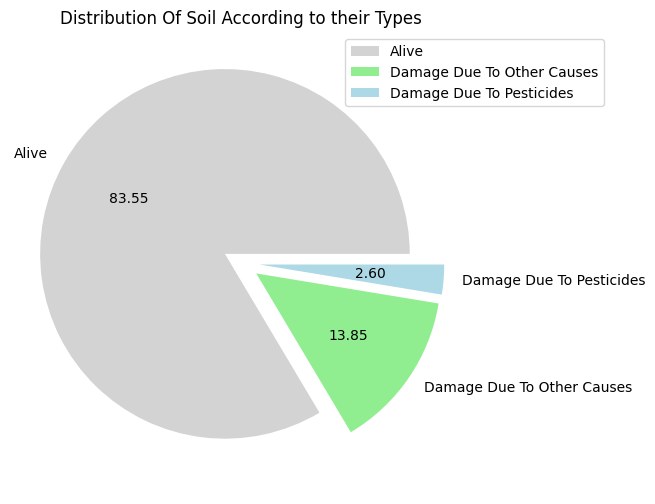

In [252]:
create_piechart(df = crop_health_df, val_col = "Frequency", 
                label_col = "Crop_Damage",
               colors = ['lightgray', 'lightgreen', 'lightblue'],
                explode = (0.1, 0.1, 0.1),
                title = "Distribution Of Soil According to their Types")

### Crop Type Distribution

In [253]:
crop_type_df = univariate_count(eda_df, col = "Crop_Type",
                               final_cols = ["Crop_Type", "Frequency"])


crop_type_df.head()

,Crop_Type,Frequency
0,Crop_Type_0,105873
1,Crop_Type_1,42295


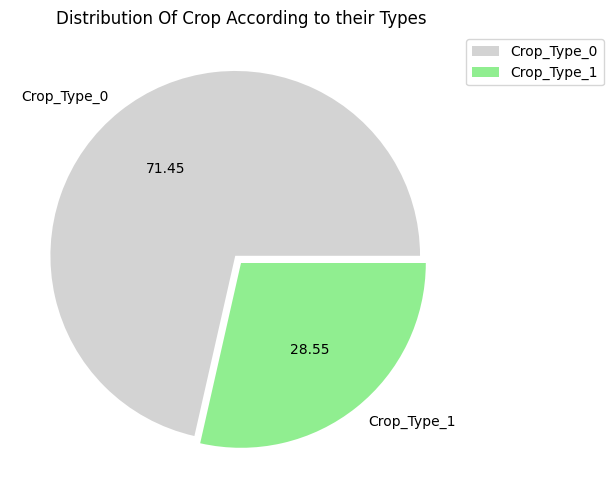

In [254]:
create_piechart(df = crop_type_df, val_col = "Frequency", 
                label_col = "Crop_Type",
                colors = ['lightgray', 'lightgreen'],
                explode = (0.05, 0),
                title = "Distribution Of Crop According to their Types")

In [255]:
crop_type_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Crop_Type")
crop_type_effect_df.head()

,Crop_Damage,Crop_Type_0,Crop_Type_1
0,Alive,52778,21460
1,Damage Due To Other Causes,9204,3103
2,Damage Due To Pesticides,1607,706


In [258]:
create_bivariate_bargraph(df = crop_type_effect_df, 
                          colors = ['red', 'blue'],
                          legend_labels = ['CropType1', 'CropType2'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Crop Type On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

## Soil Type

In [213]:
soil_type_df = univariate_count(eda_df, col = "Soil_Type",
                               final_cols = ["Soil_Type", "Frequency"])

soil_type_df.head()

,Soil_Type,Frequency
0,Infertile,80441
1,Fertile,67727


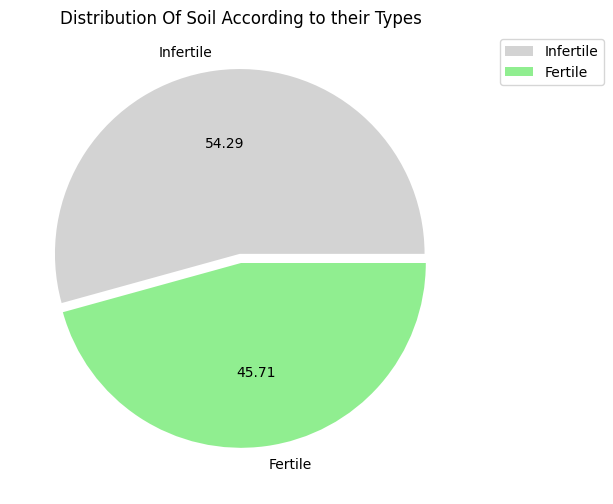

In [214]:
create_piechart(df = soil_type_df, val_col = "Frequency", 
                label_col = "Soil_Type",
               colors = ['lightgray', 'lightgreen'],explode = (0.05, 0),
                title = "Distribution Of Soil According to their Types")

In [259]:
soil_type_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Soil_Type")
soil_type_effect_df.head()

,Crop_Damage,Fertile,Infertile
0,Alive,34397,39841
1,Damage Due To Other Causes,5354,6953
2,Damage Due To Pesticides,983,1330


In [261]:
create_bivariate_bargraph(df = soil_type_effect_df, 
                          colors = ['red', 'blue'],
                          legend_labels = ['Fertile', 'Infertile'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Soil Type On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

### Pesticide_Use_Category Column

In [215]:
pesticide_use_df = univariate_count(eda_df, col = "Pesticide_Use_Category",
                               final_cols = ["Pesticide_Use_Category", "Frequency"])
pesticide_use_df.head()

,Pesticide_Use_Category,Frequency
0,Previously Used,106265
1,Currently Using,40495
2,Never Used,1408


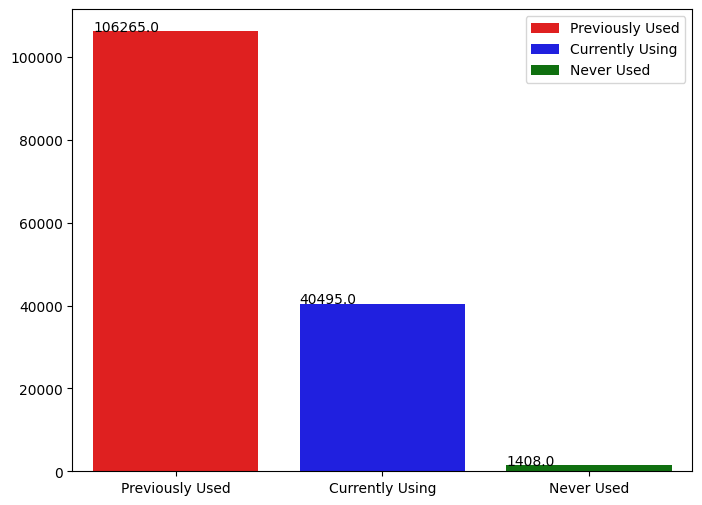

In [217]:
univariate_barplot(pesticide_use_df, val_col = "Frequency", 
                  label_col = "Pesticide_Use_Category", colors = ["red", "blue", "green"],
                  title = "", xlabel_title = "", ylabel_title = "")

### Season column

In [218]:
season_df = univariate_count(eda_df, col = "Season",
                               final_cols = ["Season", "Frequency"])
season_df.head()

,Season,Frequency
0,Season_Two,73715
1,Season_One,44744
2,Season_Three,29709


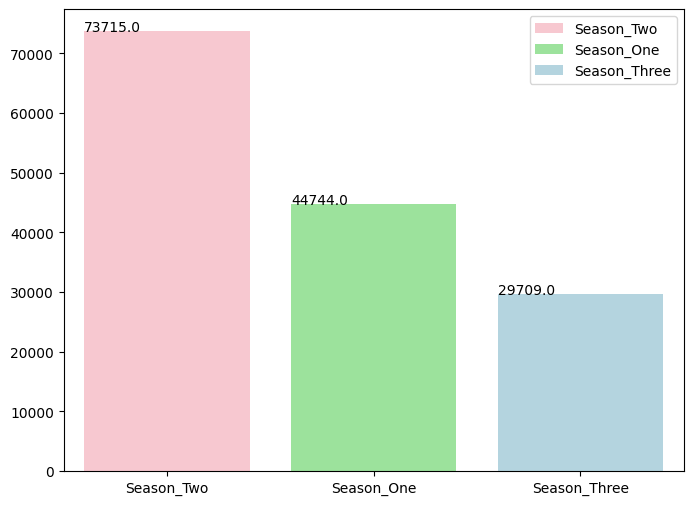

In [220]:
univariate_barplot(season_df, val_col = "Frequency", 
                  label_col = "Season", colors = ["pink", "lightgreen", "lightblue"],
                  title = "", xlabel_title = "", ylabel_title = "")

### Estimated Insects Count

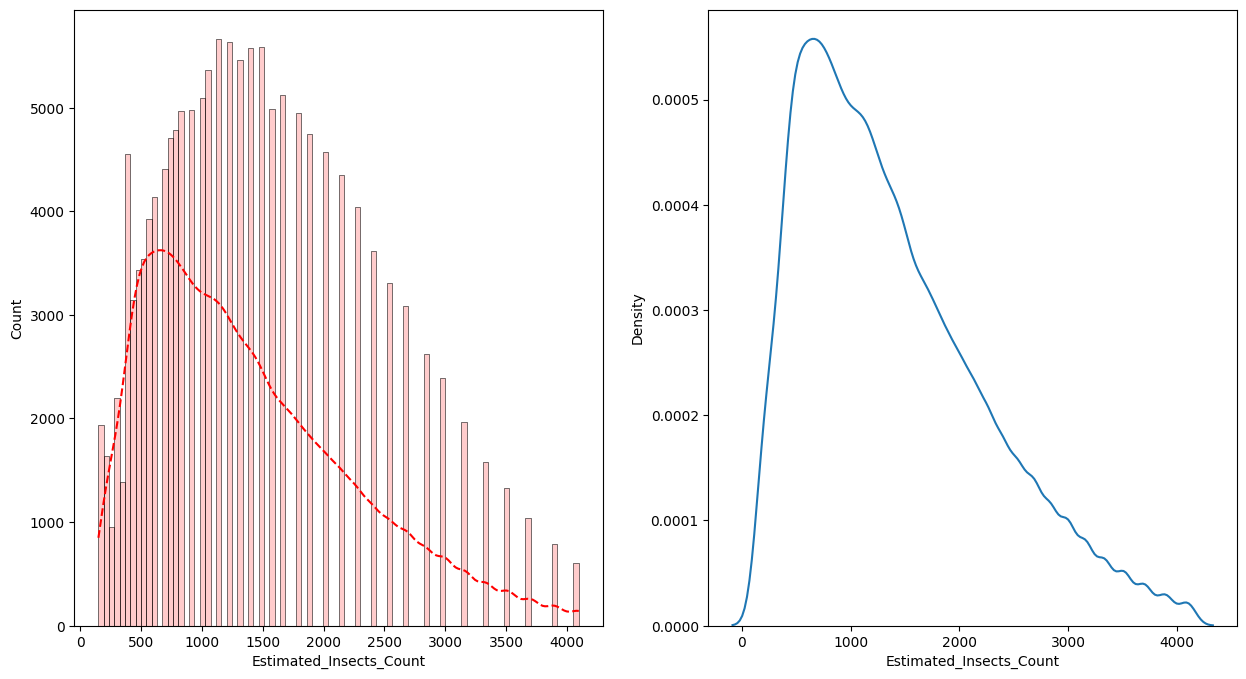

In [164]:
univariate_histplot(df = combined_df, col_name = "Estimated_Insects_Count", color = "red")

In [ ]:
bivariate_histplot(eda_df, col_name = "Estimated_Insects_Count",
                  target_col = 'Crop_Damage', colors = ['red', 'green', 'blue', 'black'])

### Number_Doses_Week column

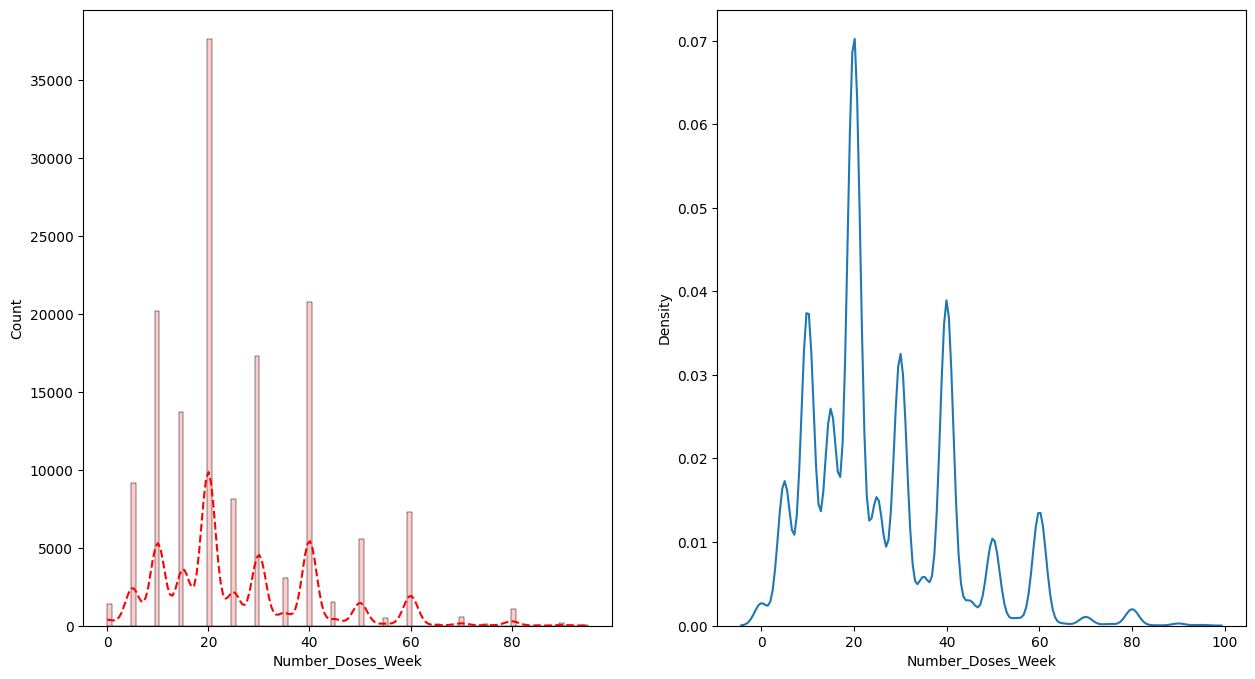

In [165]:
univariate_histplot(df = combined_df, col_name = "Number_Doses_Week", color = "red")

### Number_of_weeks_used

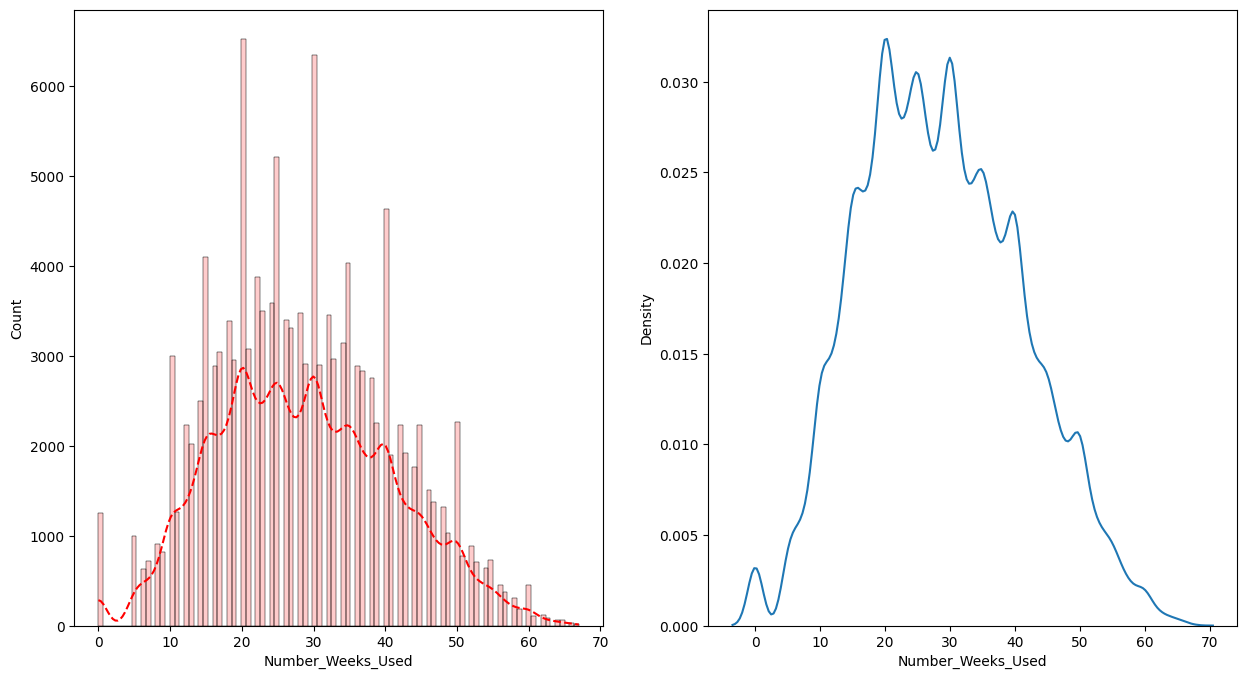

In [168]:
univariate_histplot(df = combined_df, col_name = "Number_Weeks_Used", color = "red")

### Number_Weeks_Quit

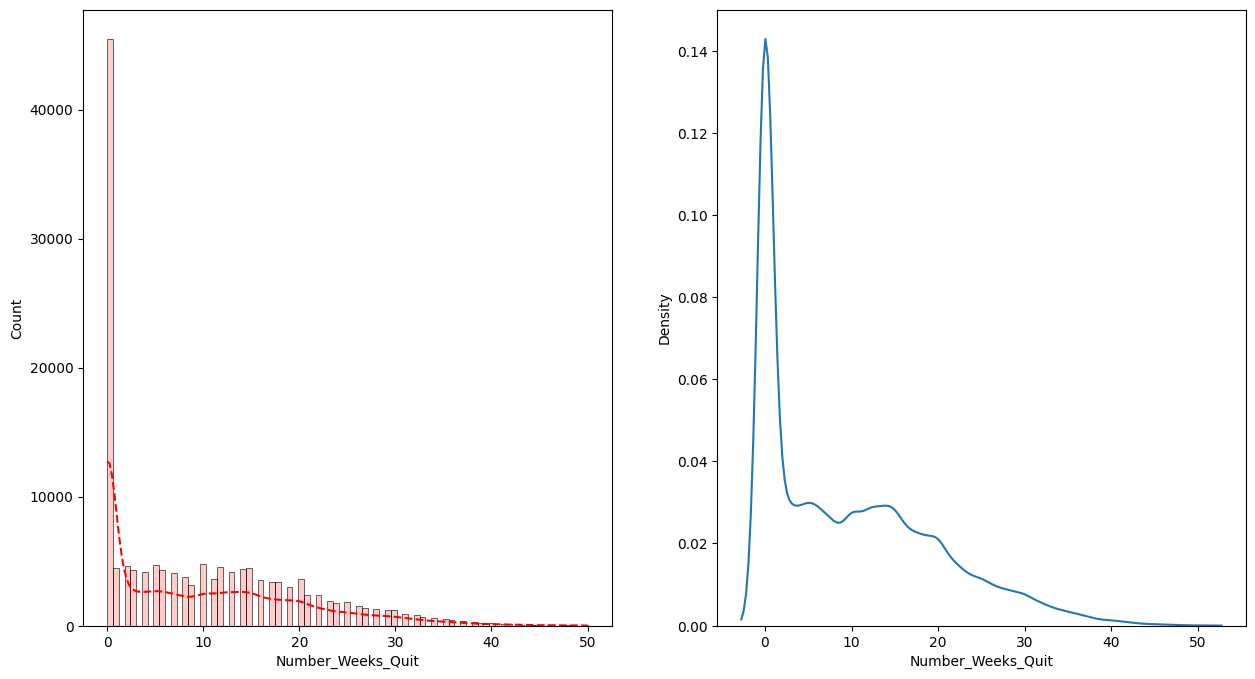

In [169]:
univariate_histplot(df = combined_df, col_name = "Number_Weeks_Quit", color = "red")